# Probabilidad simple
## Lanzamiento de una moneda
El espacio de muestras de lanzar una moneda sería:
E = {1,2,3,4,5,6}
Calcule la probabilidad de cada suceso. [1]

In [8]:
espacio_muestras = [1,2,3,4,5,6]
n = len(espacio_muestras)
probabilidad = 1.0/n
print(probabilidad)

0.16666666666666666


¿Cuál es la probabilidad de que salga un número par?

In [9]:
numeros_pares = [i for i in espacio_muestras if i % 2 is 0]
h = len(numeros_pares)
probabilidadpares = float(h)/n
print(probabilidadpares)

0.5


# Eventos independientes

¿Cuál es la probabilidad de que, al lanzar dos dados, la suma de los dados sea 7?. [2]

In [26]:
from collections import defaultdict
d={(i,j):i+j for i in range(1, 7) for j in range (1,7)}
dinv = defaultdict(list) #El objeto defaultdict del módulo de colecciones integrado crea diccionarios con valores predeterminados cuando encuentra una nueva clave. De lo contrario, habríamos tenido que crear valores predeterminados manualmente para un diccionario normal.
for i,j in d.items(): dinv[j].append(i)
print(dinv[7])
X={i:len(j)/36 for i,j in dinv.items()}
print(X)

[(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]
{2: 0.027777777777777776, 3: 0.05555555555555555, 4: 0.08333333333333333, 5: 0.1111111111111111, 6: 0.1388888888888889, 7: 0.16666666666666666, 8: 0.1388888888888889, 9: 0.1111111111111111, 10: 0.08333333333333333, 11: 0.05555555555555555, 12: 0.027777777777777776}


## La coincidencia de cumpleaños: 
Vamos a una fiesta a la que concurren un total de 50 personas. Allí un amigo nos desafía afirmando que en la fiesta debe haber por lo menos 2 personas que cumplen años el mismo día y nos apuesta 100 pesos a que está en lo correcto. Es decir, que si él acierta deberíamos pagarle los 100 pesos; o en caso contrario, el nos pagará los 100 pesos. ¿Deberíamos aceptar la apuesta?. [3]


In [19]:
probabilidad = 1.0
asistentes=50

for i in range(asistentes):
    probabilidad=probabilidad*(365-i)/365
    
print("La probabilidad de que dos personas en las misma fiesta compartan una fecha de cumpleaños es de {0:.3f}" 
      .format(1-probabilidad))

La probabilidad de que dos personas en las misma fiesta compartan una fecha de cumpleaños es de 0.970


# Teorema de Bayes
Dada una ciudad de 50 000 habitantes, con la siguiente distribución:
Niñas    Niños   Mujeres    Hombres
11000    9000     16000     14000

Y, un reporte de 9000 casos de gripe, distribuidos de la siguiente forma:
Niñas    Niños   Mujeres    Hombres
2000     1500     3000      2500

Se pretende obtener la probabilidad de que la causa de contraer gripe sea el hecho de pertences a un determinado sector demográfico (por ejemplo, al sector demográfico conformado por niños o niñas).[4]

In [49]:
#1-Cálculo de probabilidad a priori
habitantes = [11000, 9000, 16000, 14000]# se utilizará map(float, <lista>) en el código fuente, para convertir los elementos de una lista en números reales, toda vez que hacerlo no sobrecargue el código.
n = sum(habitantes)
#print(habitantes)
pa = [h / n for h in habitantes]
#print(pa)
#2-Probabilidades de transición
afectados = [2000, 1500, 3000, 2500]
pi = [k / n for k in afectados]
#print(pi)
pba = [pi[i] / pa[i] for i in range(len(pi))]
#3-Probabilidad total
productos = [pa[i] * pba[i] for i in range(len(pa))]
pb = sum(productos)
#4-Probabilidad a posteriori
pab = [p / pb for p in productos]
print(pab)

[0.22222222222222224, 0.16666666666666666, 0.3333333333333333, 0.2777777777777778]


# Librerías de Python para probabilidad y estadística
La idea de estos tutoriales es demostrar la buena relación de Python con las matemáticas. Por lo tanto existe una librería para casi todas las aplicaciones para las que se requiera utilizar este lenguaje. Los principales que nos será útiles, según [3], se enlistan a continuación:

numpy: El popular paquete matemático de Python, se utiliza tanto que mucha gente ya lo considera parte integral del lenguaje. Nos proporciona algunas funciones estadísticas que podemos aplicar fácilmente sobre los arrays de Numpy.

scipy.stats: Este submodulo del paquete científico Scipy es el complemento perfecto para Numpy, las funciones estadisticas que no encontremos en uno, las podemos encontrar en el otro.

statsmodels: Esta librería nos brinda un gran número de herramientas para explorar datos, estimar modelos estadísticos, realizar pruebas estadísticas y muchas cosas más.

matplotlib: Es la librería más popular en Python para visualizaciones y gráficos. Ella nos va a permitir realizar los gráficos de las distintas distribuciones de datos.

seaborn: Esta librería es un complemento ideal de matplotlib para realizar gráficos estadísticos.

pandas: Esta es la librería más popular para análisis de datos y financieros. Posee algunas funciones muy útiles para realizar estadística descriptiva sobre nuestros datos y nos facilita sobremanera el trabajar con series de tiempo.

pyMC: pyMC es un módulo de Python que implementa modelos estadísticos bayesianos, incluyendo la cadena de Markov Monte Carlo(MCMC). pyMC ofrece funcionalidades para hacer el análisis bayesiano lo mas simple posible.

# Graficación 
## Curva gausseana
Para la graficación en python propiamente, se debe de contar con el módulo de matplotlib y de numpy, además de scipy.
Si no se cuenta con los mismos se debe de seguir ls instrucciones del siguiente tutorial: https://youtu.be/-llHYUMH9Dg

Si les recomienda actualizar el pip mediante el código "python -m pip install --upgrade pip", sigan las instrucciones de este tutorial de actualización del pip: https://datatofish.com/upgrade-pip/.

La Distribución Normal, o también llamada Distribución de Gauss, es aplicable a un amplio rango de problemas, lo que la convierte en la distribución más utilizada en estadística.[3]

In [4]:
# importando modulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns 

np.random.seed(2016) # replicar random

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

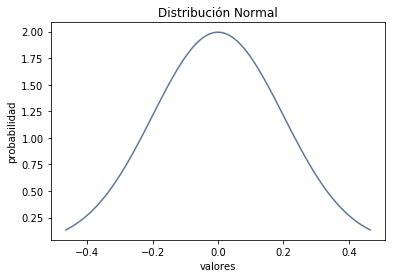

In [7]:
# Graficando Normal
mu, sigma = 0, 0.2 # media y desvio estandar
normal = stats.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

## Histograma
Una de las mejores maneras de describir una variable es representar los valores que aparecen en el conjunto de datos y el número de veces que aparece cada valor. La representación más común de una distribución es un histograma, que es un gráfico que muestra la frecuencia de cada valor. [3]

In [36]:
# importando modulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns 

np.random.seed(2016) # replicar random

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

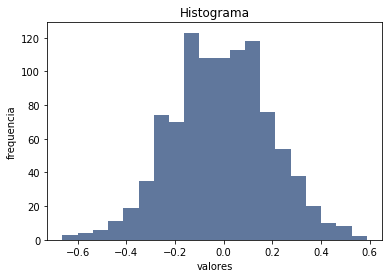

In [37]:
# Graficando histograma
mu, sigma = 0, 0.2 # media y desvio estandar
datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

## Histograma de distribución normal
Según el autor [3], el código para este gráfico compuesto es el siguiente:

In [38]:
# Graficos embebidos.
%matplotlib inline

In [39]:
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns # importando seaborn

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [40]:
mu, sigma = 0, 0.1 # media y desvio estandar
s = np.random.normal(mu, sigma, 1000) #creando muestra de datos

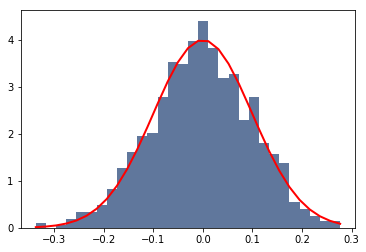

In [42]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(s, 30, density=True)
normal = plt.plot(cajas, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (cajas - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

# Conceptos básicos de la probabilidad descriptiva
Calcular los principales indicadores de la estadística descriptiva con Python utilización las librerias anteriormente expuestas resulta como los siguientes ejemplos que nos muestra el autor [3]:

In [9]:
# Ejemplos de estadistica descriptiva con python

import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas

np.random.seed(2131982) # para poder replicar el random

In [10]:
datos = np.random.randn(5, 4) # datos normalmente distribuidos
datos

array([[ 0.46038022, -1.08942528, -0.62681496, -0.63329028],
       [-0.1074033 , -0.88138082, -0.34466623, -0.28320214],
       [ 0.94051171,  0.86693793,  1.20947882, -0.16894118],
       [-0.12790177, -0.58099931, -0.46188426, -0.18148302],
       [-0.76959435, -1.37414587,  1.37696874, -0.18040537]])

In [11]:
# media arítmetica
datos.mean() # Calcula la media aritmetica de

-0.14786303590303568

In [12]:
np.mean(datos) # Mismo resultado desde la funcion de numpy

-0.14786303590303568

In [13]:
datos.mean(axis=1) # media aritmetica de cada fila

array([-0.47228757, -0.40416312,  0.71199682, -0.33806709, -0.23679421])

In [14]:
datos.mean(axis=0) # media aritmetica de cada columna

array([ 0.0791985 , -0.61180267,  0.23061642, -0.2894644 ])

In [15]:
# mediana
np.median(datos)

-0.23234258265023794

In [16]:
np.median(datos, 0) # media aritmetica de cada columna

array([-0.1074033 , -0.88138082, -0.34466623, -0.18148302])

In [17]:
# Desviación típica
np.std(datos)

0.7375535458407161

In [18]:
np.std(datos, 0) # Desviación típica de cada columna

array([0.58057213, 0.78352862, 0.87384108, 0.17682485])

In [19]:
# varianza
np.var(datos)

0.5439852329822132

In [20]:
np.var(datos, 0) # varianza de cada columna

array([0.337064  , 0.6139171 , 0.76359823, 0.03126703])

In [22]:
#moda
stats.mode(datos) # Calcula la moda de cada columna
#el 2do array devuelve la frecuencia.

ModeResult(mode=array([[-0.76959435, -1.37414587, -0.62681496, -0.63329028]]), count=array([[1, 1, 1, 1]]))

In [23]:
datos2 = np.array([1, 2, 3, 6, 6, 1, 2, 4, 2, 2, 6, 6, 8, 10, 6])
stats.mode(datos2) # aqui la moda es el 6 porque aparece 5 veces en el vector.

ModeResult(mode=array([6]), count=array([5]))

In [24]:
# correlacion
np.corrcoef(datos) # Crea matriz de correlación.

array([[ 1.        ,  0.82333743,  0.15257202,  0.78798675, -0.02292073],
       [ 0.82333743,  1.        , -0.13709662,  0.86873632,  0.41234875],
       [ 0.15257202, -0.13709662,  1.        , -0.47691376,  0.21216856],
       [ 0.78798675,  0.86873632, -0.47691376,  1.        , -0.03445705],
       [-0.02292073,  0.41234875,  0.21216856, -0.03445705,  1.        ]])

In [25]:
# calculando la correlación entre dos vectores.
np.corrcoef(datos[0], datos[1])

array([[1.        , 0.82333743],
       [0.82333743, 1.        ]])

In [26]:
# covarianza
np.cov(datos) # calcula matriz de covarianza

array([[ 0.43350958,  0.18087281,  0.06082243,  0.11328658, -0.01782409],
       [ 0.18087281,  0.11132485, -0.0276957 ,  0.06329134,  0.16249513],
       [ 0.06082243, -0.0276957 ,  0.36658864, -0.06305065,  0.15172255],
       [ 0.11328658,  0.06329134, -0.06305065,  0.04767826, -0.00888624],
       [-0.01782409,  0.16249513,  0.15172255, -0.00888624,  1.39495179]])

In [27]:
# covarianza de dos vectores
np.cov(datos[0], datos[1])

array([[0.43350958, 0.18087281],
       [0.18087281, 0.11132485]])

In [28]:
# usando pandas
dataframe = pd.DataFrame(datos, index=['a', 'b', 'c', 'd', 'e'], 
                        columns=['col1', 'col2', 'col3', 'col4'])
dataframe

,col1,col2,col3,col4
a,0.460380,-1.089425,-0.626815,-0.633290
b,-0.107403,-0.881381,-0.344666,-0.283202
c,0.940512,0.866938,1.209479,-0.168941
d,-0.127902,-0.580999,-0.461884,-0.181483
e,-0.769594,-1.374146,1.376969,-0.180405


In [29]:
# resumen estadistadistico con pandas
dataframe.describe()

,col1,col2,col3,col4
count,5.000000,5.000000,5.000000,5.000000
mean,0.079199,-0.611803,0.230616,-0.289464
std,0.649099,0.876012,0.976984,0.197696
min,-0.769594,-1.374146,-0.626815,-0.633290
25%,-0.127902,-1.089425,-0.461884,-0.283202
50%,-0.107403,-0.881381,-0.344666,-0.181483
75%,0.460380,-0.580999,1.209479,-0.180405
max,0.940512,0.866938,1.376969,-0.168941


In [30]:
# sumando las columnas
dataframe.sum()

col1    0.395993
col2   -3.059013
col3    1.153082
col4   -1.447322
dtype: float64

In [31]:
# sumando filas
dataframe.sum(axis=1)

a   -1.889150
b   -1.616652
c    2.847987
d   -1.352268
e   -0.947177
dtype: float64

In [32]:
dataframe.cumsum() # acumulados

,col1,col2,col3,col4
a,0.460380,-1.089425,-0.626815,-0.633290
b,0.352977,-1.970806,-0.971481,-0.916492
c,1.293489,-1.103868,0.237998,-1.085434
d,1.165587,-1.684867,-0.223887,-1.266917
e,0.395993,-3.059013,1.153082,-1.447322


In [33]:
# media aritmetica de cada columna con pandas
dataframe.mean()

col1    0.079199
col2   -0.611803
col3    0.230616
col4   -0.289464
dtype: float64

In [34]:
# media aritmetica de cada fila con pandas
dataframe.mean(axis=1)

a   -0.472288
b   -0.404163
c    0.711997
d   -0.338067
e   -0.236794
dtype: float64

# Bibliografía
[1] Eugenia Bahit. (14 de 5 de 2019). Probabilidad de sucesos simples y compuestos mutuamente excluyentes en Python. Obtenido de RECETARIO INFORMÁTICO: http://www.eugeniabahit.com/recetario/probabilidad-de-sucesos-simples-y-compuestos-mutuamente-excluyentes-en-python

[2] José Unpingco. (2016). Python for Probability, Statistics, and Machine Learning. San Diego: Springer.

[3] Raul E. Lopez Briega. (14 de 5 de 2019). Introducción a la teoría de la probabilidad con Python. Obtenido de Matemáticas, análisis de datos y python: https://relopezbriega.github.io/blog/2016/11/26/introduccion-a-la-teoria-de-probabilidad-con-python/

[4] Eugenia Bahit. (14 de 5 de 2019). Teorema de Bayes en Python. Obtenido de RECETARIO INFORMÁTICO: http://www.eugeniabahit.com/recetario/probabilidad-de-sucesos-simples-y-compuestos-mutuamente-excluyentes-en-python

